In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from rich import print as rprint
from torch import nn

from analysis.common import load_mlp
from analysis.residual_alignment_methods import alignment, plotsvals, sab, trajectories
from koopmann import aesthetics
from koopmann.data import (
    DatasetConfig,
    create_data_loader,
    get_dataset_class,
)
from koopmann.models import MLP, ResMLP
from koopmann.models.utils import parse_safetensors_metadata
from koopmann.utils import (
    compute_model_accuracy,
)
from koopmann.visualization import plot_decision_boundary

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
file_dir = "/scratch/nsa325/koopmann_model_saves/"
model_name = "mnist_model_residual"

In [29]:
model, model_metadata = load_mlp(file_dir, model_name)
print(model_metadata)

{'batchnorm': 'True', 'bias': 'False', 'config': '[512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512]', 'dataset': 'MNISTDataset', 'input_dimension': '784', 'nonlinearity': 'relu', 'output_dimension': '10', 'stochastic_depth_mode': 'batch', 'stochastic_depth_prob': '0.3'}


In [30]:
# Dataset config
dataset_config = DatasetConfig(
    dataset_name=model_metadata["dataset"],
    num_samples=3_000,
    split="test",
    seed=42,
)
DatasetClass = get_dataset_class(name=dataset_config.dataset_name)
dataset = DatasetClass(config=dataset_config)
dataloader = create_data_loader(dataset, batch_size=1024)

In [31]:
rprint(f"Testing Accuracy: {compute_model_accuracy(model, dataset)}")

Testing Accuracy: 0.988099992275238

In [32]:
if dataset.in_features == 2:
    plot_decision_boundary(
        model,
        model.state_dict(),
        dataset.features,
        dataset.labels.squeeze(),
        labels=[0, 1, 2],
    )

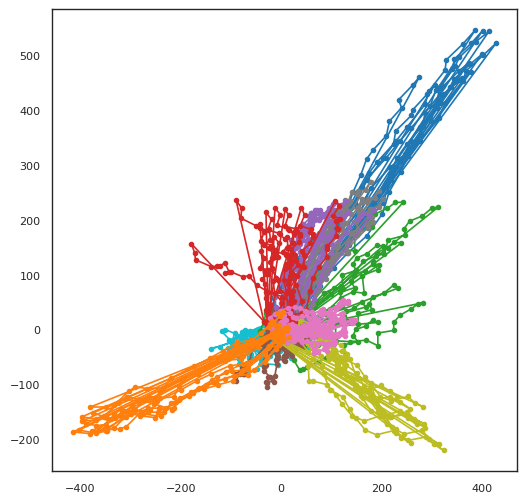

svding layer 0
svding layer 1
svding layer 2
svding layer 3
svding layer 4
svding layer 5
svding layer 6
svding layer 7
svding layer 8
svding layer 9
svding layer 10
svding layer 11
svding layer 12
svding layer 13
svding layer 14
svding layer 15
fit_line 0.7371463775634766


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


In [33]:
model.eval()
if "residual" in model_name:
    # sab(model)
    trajectories(model, dataloader, 10, 10)
    images, labels = next(iter(dataloader))
    x = images[0]
    _ = model(x)
    acts, patts = model.get_fwd_acts_patts()
    acts = list(acts.values())
    patts = list(patts.values())
    JUSV = plotsvals(acts, patts, title="Test")
    alignment(acts, patts, title="Test", JUSV=JUSV)

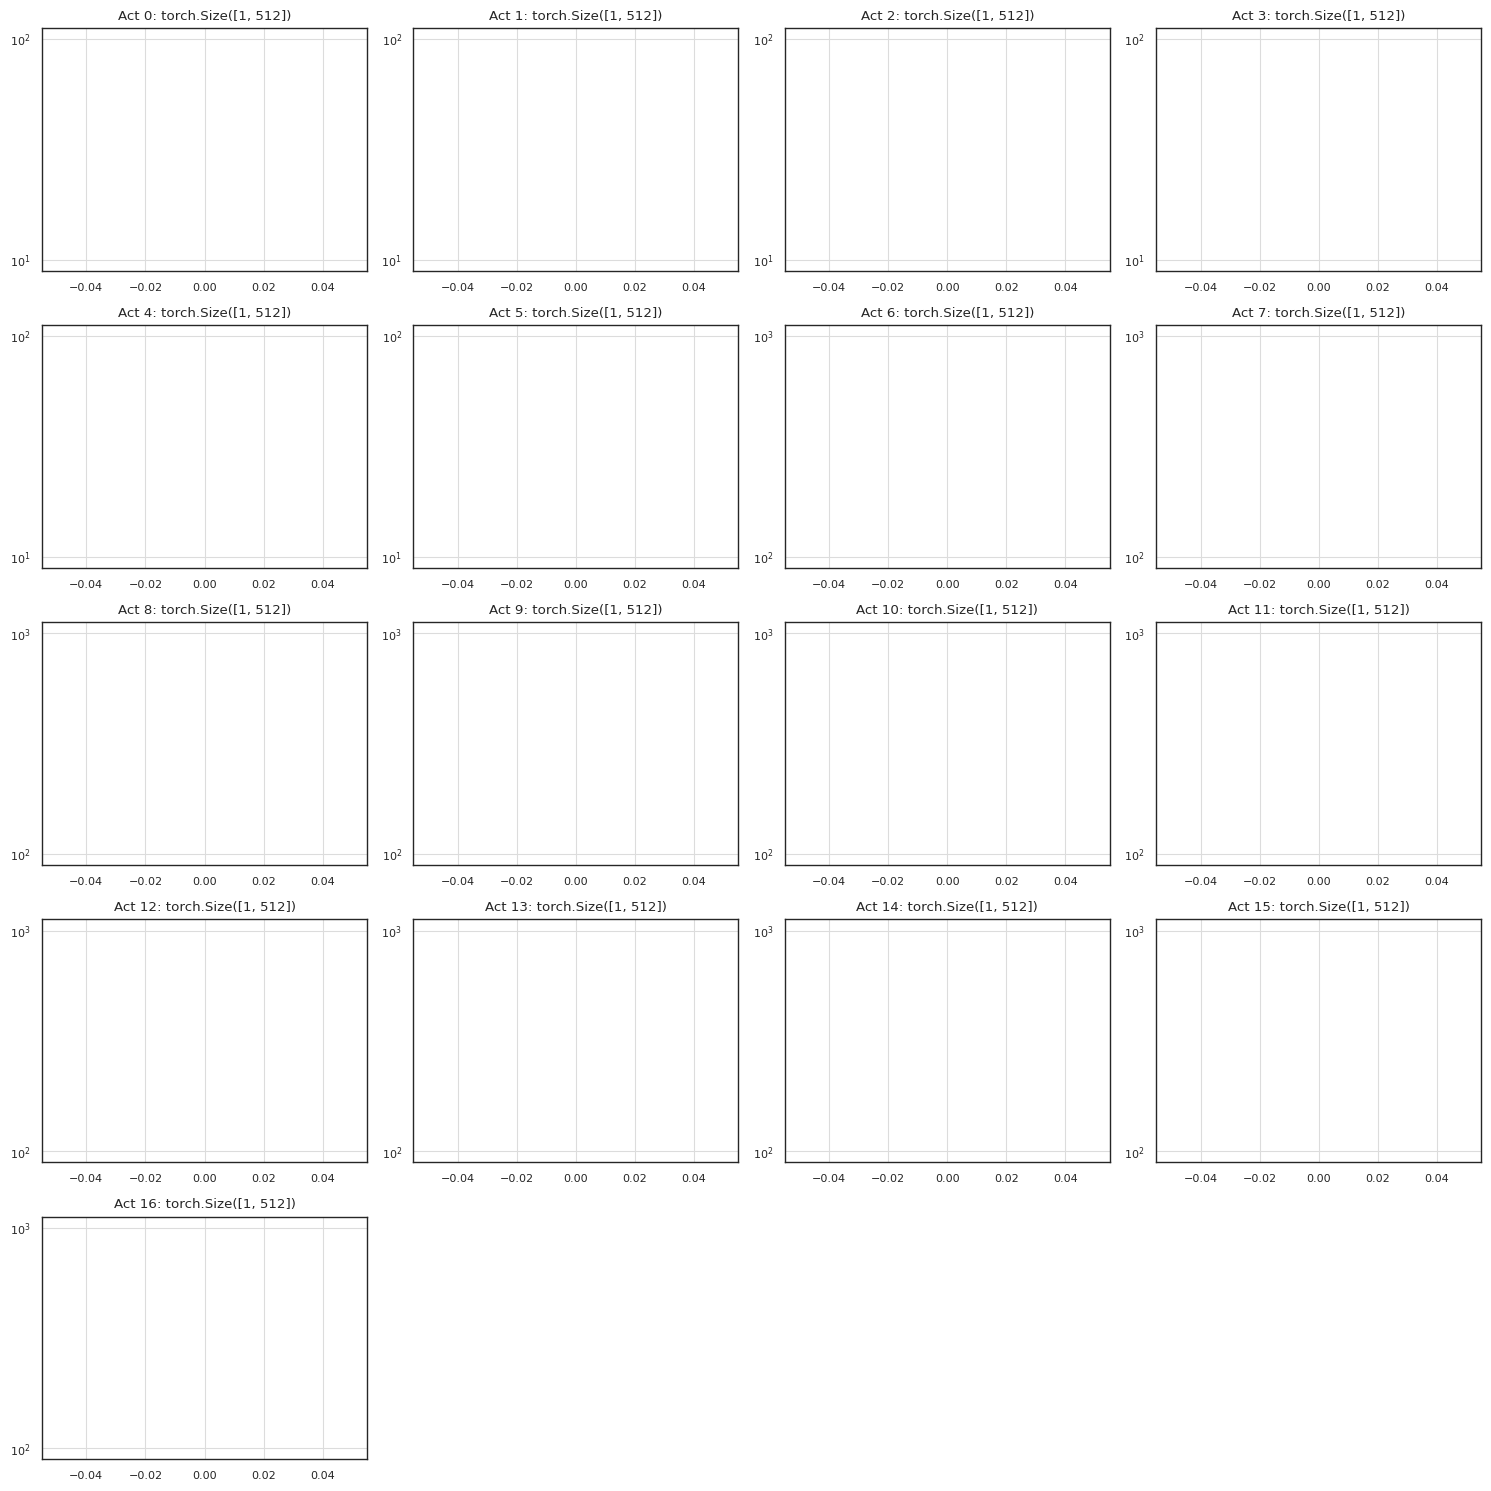

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch


# Function to plot singular values
def plot_singular_values(acts):
    # Determine grid size
    n_acts = len(acts)
    cols = 4
    rows = (n_acts + cols - 1) // cols

    # Create figure
    plt.figure(figsize=(15, rows * 3))

    # Plot each activation's singular values
    for i, act in enumerate(acts):
        # Compute SVD
        U, S, V = torch.svd(act)

        # Plot
        plt.subplot(rows, cols, i + 1)
        # plt.semilogy(S.detach().cpu().numpy())  # Log scale
        plt.title(f"Act {i}: {act.shape}")
        plt.grid(True)

    plt.tight_layout()
    plt.show()


# Run the visualization
plot_singular_values(acts)